# Goal: 

Plot Mobile Clicks Over Time
<br>Null hypothesis: There is no change in click frequencies over time
<br>*Should be noted that clicks will likely decrease over time anyway because of dropout...solution...look at individual user clicks

***What have I done below?***
<br>-created dataframe with relevant fields (including time, excluding NaN values)
<br>-converted time to a string 
<br>-counted number of clicks for a specified number of top users PER WEEK
<br>-plotted usage over weeks
<br>***What can we (gently) conclude from the data?***
<br>-no immediate patterns stick out in the first 10 users
<br>-big outlier...probs course administrator
<br>-the top mobile users do use mobile most weeks (at least for the first 9 weeks)(course is 9 weeks)
<br>-there is generally no steady decline or sudden drop off 
<br>***Any issues?***
<br>-original issues were resolved! 
<br>-now want to do the things below (and also clean notebooks)
<br>-I want to plot a single user's mobile and non_mobile usage over time, right now it's just mobile (started this... and look at all)
<br>-I also want to look at event clicks as a fraction of total clicks (sep notebook)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import datetime
from sklearn import preprocessing
from no_PII_Storage_folder import *

datetimeFormat = '%Y-%m-%d %H:%M:%S.%f %Z'

In [2]:
%run all_utilities.ipynb
#all functions are in this notebook

In [3]:
user_data_org = pd.read_csv(r'\ALL_DATA.csv')
mobile_data_org = pd.read_csv(r'MOBILE_DATA.csv')
non_mobile_data_org = pd.read_csv(r'NON_MOBILE_DATA.csv')

user_data_org = user_data_org.drop(['Unnamed: 0'], axis = 1)
mobile_data_org = mobile_data_org.drop(['Unnamed: 0'], axis = 1)
non_mobile_data_org = non_mobile_data_org.drop(['Unnamed: 0'], axis = 1)

In [4]:
user_data = user_data_org
mobile_data = mobile_data_org
non_mobile_data = non_mobile_data_org

# print(user_data_org.isna().any())
# print(user_data_org.isnull().any())

user_data = user_data.dropna()
user_data = user_data.reset_index(drop=True)
mobile_data = mobile_data.dropna()
mobile_data = mobile_data.reset_index(drop=True)
non_mobile_data = non_mobile_data.dropna()
non_mobile_data = non_mobile_data.reset_index(drop=True)
assert (len(user_data) - len(non_mobile_data)) == (len(mobile_data))
print(len(user_data))

3329792


In [5]:
#finalizes mobile and non_mobile dataframes
mobile_data = mobile_data.sort_values(by = "time", ascending = True)
mobile_data = mobile_data.reset_index()

non_mobile_data = non_mobile_data.sort_values(by = "time", ascending = True)
non_mobile_data = non_mobile_data.reset_index()

print(len(mobile_data))
#12/21/2016 - 7/2/2017

56044


In [6]:
#find top MOBILE users
NUM_TOP = 15
#no nan because lots of nans in names????
data_copy  = mobile_data.dropna()
data_copy = data_copy.reset_index(drop=True)

top_users = get_top_users(data_copy, NUM_TOP)
top_users = top_users.drop(['index'], axis = 1)
top_users.head(NUM_TOP)

,username,no. clicks
0,9589599fce0cecbe02eb2b02457b1ef6,2838
1,3693313ce79182c3009e6414b3ade459,2471
2,d39491d5e973c40e3b1e5957cce823ee,1893
3,d41d8cd98f00b204e9800998ecf8427e,1381
4,bed7f1f1761c5368859d1421fcb4e013,1239
5,eb97b8fc1faff95a146c939d4316d24c,991
6,e50c955be3a9f25261169e3298e939a3,893
7,bb2d33a5636b647b21518bdb00c55cbf,891
8,dc9ffb87732c5ead8c371e11d544642f,771
9,2a706bae2ec9c72ebcf03154e84cea77,764


In [7]:
#create dataframe if mobile data that ONLY contains data from the top users
temp = pd.DataFrame()
top_user = pd.DataFrame()

for count in range(len(top_users)):
    temp = mobile_data[mobile_data['username'].str.contains(top_users['username'][count])]
    top_user = pd.concat([temp, top_user], axis = 0, sort = False)

print(len(top_user))
top_user = top_user.reset_index(drop = True)
top_user.head(2)

17402


,index,time,username,event_source,agent,name
0,45907,2017-03-18 07:11:28.699383 UTC,637e1609b1725148725ded8146398855,browser,Mozilla/5.0 (Linux; Android 7.0; Moto G (4) Bu...,edx.ui.lms.sequence.next_selected
1,45906,2017-03-18 07:11:30.021024 UTC,637e1609b1725148725ded8146398855,browser,Mozilla/5.0 (Linux; Android 7.0; Moto G (4) Bu...,page_close


In [8]:
copy_top = convert_time(top_user)
copy_top.head(2)

No milliseconds count: 0


,index,time,username,event_source,agent,name,timestamp
8819,36177,2016-12-22 04:27:26.225144 UTC,d41d8cd98f00b204e9800998ecf8427e,server,edX/org.edx.mobile (2.7.3; OS Version 10.2 (Bu...,edx.course.enrollment.activated,2016-12-22 04:27:26.225144
8820,36241,2016-12-23 03:26:05.270829 UTC,d41d8cd98f00b204e9800998ecf8427e,server,edX/org.edx.mobile (2.7.3; OS Version 9.3.5 (B...,edx.course.enrollment.activated,2016-12-23 03:26:05.270829


In [9]:
#creates dataframe to be used for plotting
top_user_week_counts = create_count_df_mobile (copy_top)

print(len(top_user_week_counts))
print(copy_top['username'].nunique())
top_user_week_counts.head(2)

144
15


,username,week_year,count
0,d41d8cd98f00b204e9800998ecf8427e,01/2017,17
1,d41d8cd98f00b204e9800998ecf8427e,02/2017,25


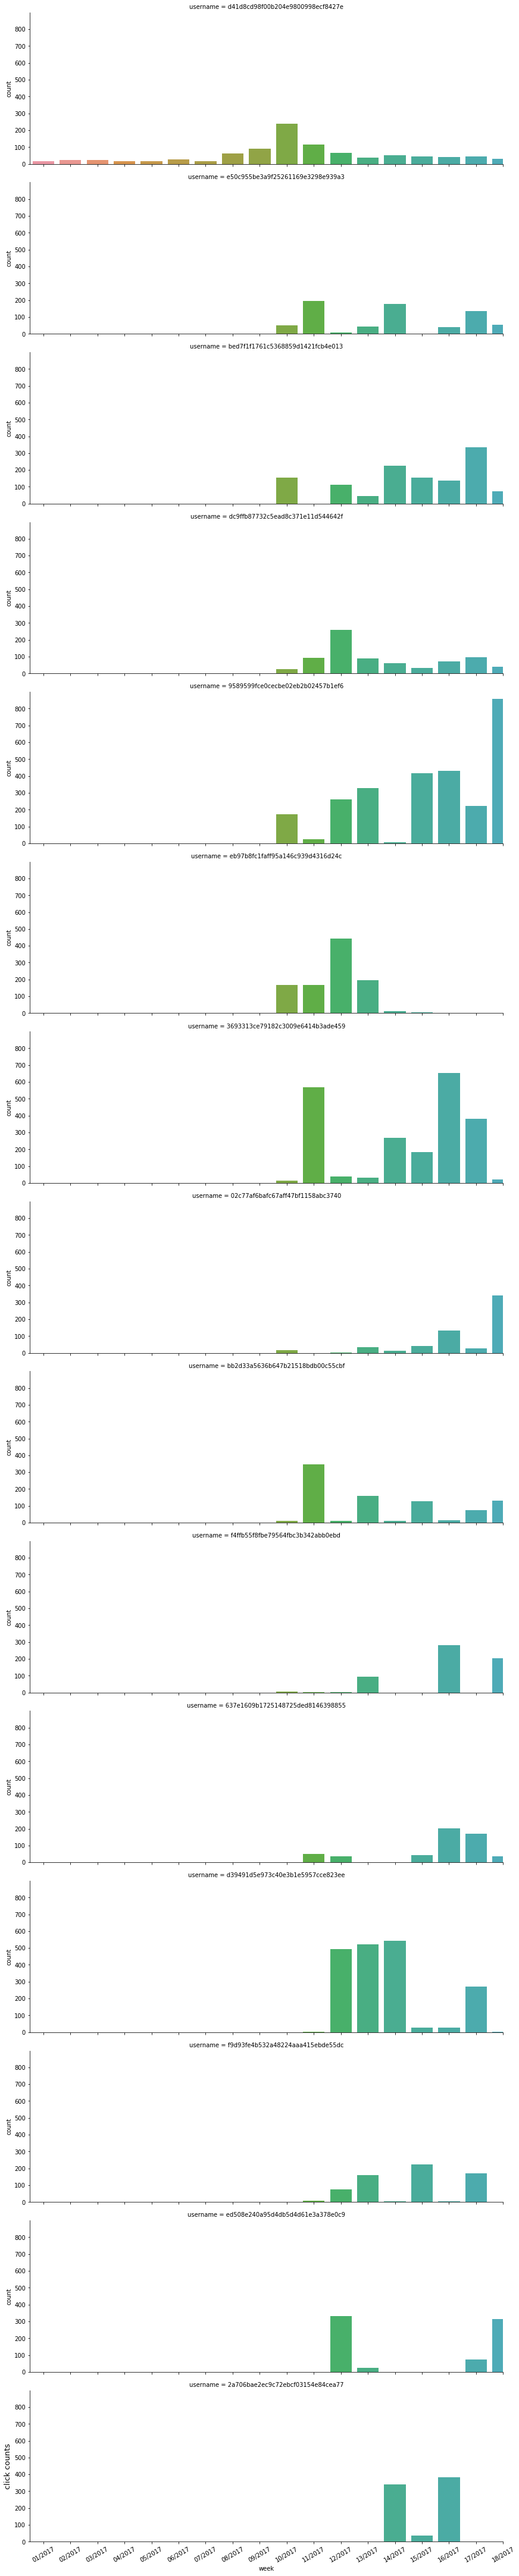

In [10]:
#user d41d8cd98f00b204e9800998ecf8427e is a biggg outlier...course administrator??? 

sns.catplot(x = "week_year", y = "count", col_wrap = 1, 
            col = "username", data = top_user_week_counts, kind = "bar",
            height = 4, aspect = 3)
# plt.title("Counts over time for mobile user " + str(top_user_week_counts['username'][count]), fontsize = 14)
plt.xlabel('week', fontsize = 10)
plt.ylabel('click counts', fontsize = 13)
plt.xticks(rotation = 30)
plt.xlim(-.50,17)
plt.show()

In [11]:
#create device column on mobile dataframe
mobile_data_labeled = mobile_data
non_mobile_data_labeled = mobile_data
device_list = []

for count in range(len(mobile_data_labeled)):
     device_list.append('mobile')
mobile_data_labeled['device'] = device_list  

mobile_data_labeled.head(3)

,index,time,username,event_source,agent,name,device
0,36141,2016-12-21 18:38:38.05078 UTC,c92e2ee0a3fcfb553ddf451b2421ef3c,server,edX/org.edx.mobile (2.7.3; OS Version 10.2 (Bu...,edx.course.enrollment.activated,mobile
1,36177,2016-12-22 04:27:26.225144 UTC,d41d8cd98f00b204e9800998ecf8427e,server,edX/org.edx.mobile (2.7.3; OS Version 10.2 (Bu...,edx.course.enrollment.activated,mobile
2,36178,2016-12-22 18:57:49.47778 UTC,5047eadabd5014d2ba50531f8ce12ca2,server,edX/org.edx.mobile (2.7.3; OS Version 10.1.1 (...,edx.course.enrollment.activated,mobile


In [12]:
mobile_data_labeled = mobile_data_labeled.sort_values(by = 'time', ascending = True)
mobile_data_labeled.head(56013)
#print(len(mobile_data_labeled))

,index,time,username,event_source,agent,name,device
0,36141,2016-12-21 18:38:38.05078 UTC,c92e2ee0a3fcfb553ddf451b2421ef3c,server,edX/org.edx.mobile (2.7.3; OS Version 10.2 (Bu...,edx.course.enrollment.activated,mobile
1,36177,2016-12-22 04:27:26.225144 UTC,d41d8cd98f00b204e9800998ecf8427e,server,edX/org.edx.mobile (2.7.3; OS Version 10.2 (Bu...,edx.course.enrollment.activated,mobile
2,36178,2016-12-22 18:57:49.47778 UTC,5047eadabd5014d2ba50531f8ce12ca2,server,edX/org.edx.mobile (2.7.3; OS Version 10.1.1 (...,edx.course.enrollment.activated,mobile
3,36241,2016-12-23 03:26:05.270829 UTC,d41d8cd98f00b204e9800998ecf8427e,server,edX/org.edx.mobile (2.7.3; OS Version 9.3.5 (B...,edx.course.enrollment.activated,mobile
4,36401,2016-12-24 01:03:24.853648 UTC,9b230a99d81267fca0f8a043849c0caf,server,edX/org.edx.mobile (2.7.3; OS Version 10.2 (Bu...,edx.course.enrollment.activated,mobile
...,...,...,...,...,...,...,...
56008,35995,2017-07-06 20:44:39.161423 UTC,72843c74e9c68debc3cefd61cd2c4d7d,browser,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,seek_video,mobile
56009,36014,2017-07-06 20:45:06.402811 UTC,72843c74e9c68debc3cefd61cd2c4d7d,browser,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,pause_video,mobile
56010,35983,2017-07-06 20:45:11.622854 UTC,72843c74e9c68debc3cefd61cd2c4d7d,browser,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,play_video,mobile
56011,35996,2017-07-06 20:45:29.736603 UTC,72843c74e9c68debc3cefd61cd2c4d7d,browser,Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-...,seek_video,mobile


In [13]:
#create device column on non_mobile dataframe
non_mobile_data_labeled = non_mobile_data
non_mobile_data_labeled = non_mobile_data
device_list = []

for count in range(len(non_mobile_data_labeled)):
     device_list.append('non_mobile')
non_mobile_data_labeled['device'] = device_list  

#non_mobile_data_labeled.head(3)

In [14]:
print(len(non_mobile_data_labeled))

3273748


In [15]:
#concatenate both data frames
top_users_labeled = pd.concat([mobile_data_labeled, non_mobile_data_labeled], axis = 0, sort = False)
top_users_labeled = top_users_labeled.reset_index(drop = True)

#top_users_labeled.head(2)

In [16]:
#use ONLY top users

temp = pd.DataFrame()
top_user_labeled__num = pd.DataFrame()

for count in range(len(top_users)):
    temp = top_users_labeled[top_users_labeled['username'].str.contains(top_users['username'][count]) & ~top_users_labeled['username'].str.contains('d41d8cd98f00b204e9800998ecf8427e')]
    top_user_labeled__num = pd.concat([temp, top_user_labeled__num], axis = 0, sort = False)

print(len(top_user_labeled__num))
top_user = top_user.drop(['index'], axis = 1)
top_user_labeled__num = top_user_labeled__num.reset_index(drop = True)
top_user_labeled__num.head(2)

64355


,index,time,username,event_source,agent,name,device
0,45907,2017-03-18 07:11:28.699383 UTC,637e1609b1725148725ded8146398855,browser,Mozilla/5.0 (Linux; Android 7.0; Moto G (4) Bu...,edx.ui.lms.sequence.next_selected,mobile
1,45906,2017-03-18 07:11:30.021024 UTC,637e1609b1725148725ded8146398855,browser,Mozilla/5.0 (Linux; Android 7.0; Moto G (4) Bu...,page_close,mobile


In [17]:
copy_top_users_labeled = convert_time(top_user_labeled__num)

No milliseconds count: 1


In [18]:
# create dataframe for plotting
all_top_users = create_count_df_user(copy_top_users_labeled)

print(len(copy_top_users_labeled))
print(copy_top_users_labeled['username'].nunique())
all_top_users.head(2)

64355
14


,username,device,week_year,count
0,3693313ce79182c3009e6414b3ade459,mobile,10/2017,14
1,e50c955be3a9f25261169e3298e939a3,mobile,10/2017,51


Blue = mobile, Orange = non_mobile


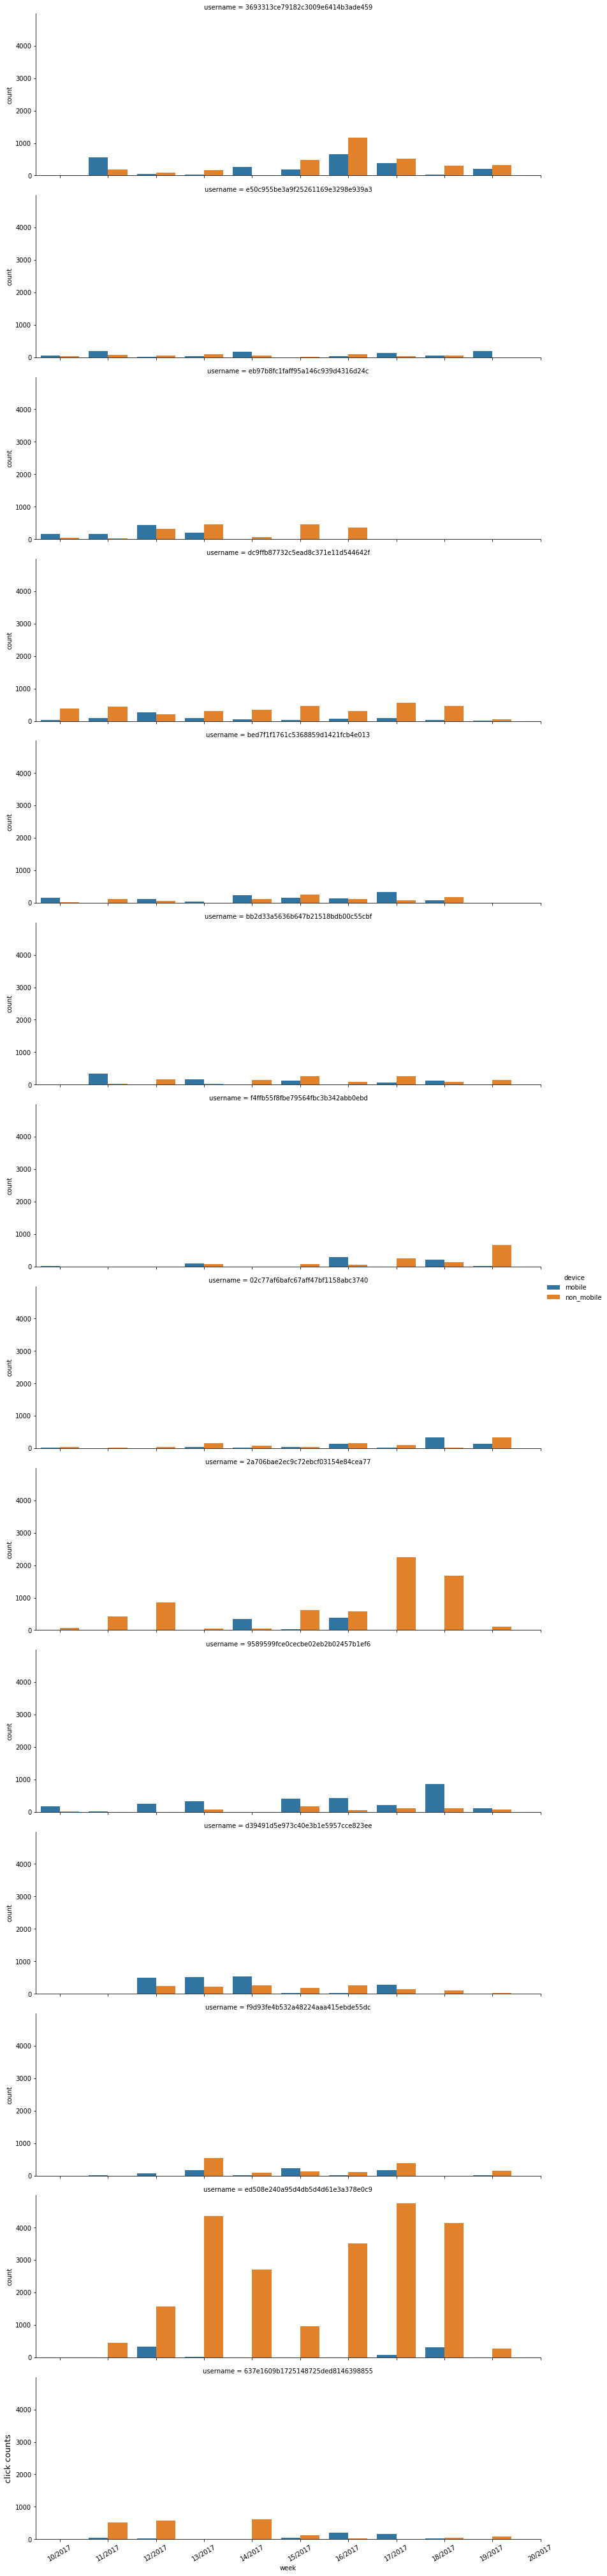

In [19]:
print("Blue = mobile, Orange = non_mobile")
sns.catplot(x = "week_year", y = "count", col_wrap = 1, hue =  'device', 
            col = "username", data = all_top_users, kind = "bar",
            height = 4, aspect = 3)
plt.xlabel('week', fontsize = 10)
plt.ylabel('click counts', fontsize = 13)
plt.xticks(rotation = 30)
plt.xlim(-.50,10)
plt.show()

# Conclusions from above plots

<br>-top mobile users do not solely use mobile device
<br>-(correlation) top mobile users appear less likely to drop out of the course
<br>-some, but not all, of users show a trend of increased non_mobile usage as time progresses
<br> <br>
NOW, going to plot for all

In [20]:
top_users_labeled.head(2)

,index,time,username,event_source,agent,name,device
0,36141,2016-12-21 18:38:38.05078 UTC,c92e2ee0a3fcfb553ddf451b2421ef3c,server,edX/org.edx.mobile (2.7.3; OS Version 10.2 (Bu...,edx.course.enrollment.activated,mobile
1,36177,2016-12-22 04:27:26.225144 UTC,d41d8cd98f00b204e9800998ecf8427e,server,edX/org.edx.mobile (2.7.3; OS Version 10.2 (Bu...,edx.course.enrollment.activated,mobile


In [21]:
#create dataframe with week_year, clickcount in that week_year, and device type
all_users_to_plot_converted = convert_time(top_users_labeled)
all_users_to_plot = create_count_df_user(all_users_to_plot_converted)
#all_users_to_plot = all_users_to_plot.drop(['username'], axis = 1)
all_users_weeks = create_count_df_perweek(all_users_to_plot)

No milliseconds count: 25


In [22]:
all_users_to_plot.head(50)

,username,device,week_year,count
0,d8f2baf9e72d47d779c0d32b3b6634e9,non_mobile,01/2017,1
1,b5cb2715b8ab916f9b4cdd4b93fa0056,non_mobile,01/2017,1
2,8f922d9b054882ebab10b394e8f0b0c3,non_mobile,01/2017,1
3,e1e8ad2183051bd3381b263a13e2ebe4,mobile,01/2017,1
4,22cecee414e5756c92a835c8dc976803,non_mobile,01/2017,1
5,45d68a32c4dc906d98a3ebc0617934d2,non_mobile,01/2017,1
6,986b7d7275de80287e74276c2d33cdb1,non_mobile,01/2017,1
7,d41d8cd98f00b204e9800998ecf8427e,mobile,01/2017,17
8,d41d8cd98f00b204e9800998ecf8427e,non_mobile,01/2017,773
9,d69d927fbff7d645ce2be9f694b373d3,non_mobile,01/2017,1


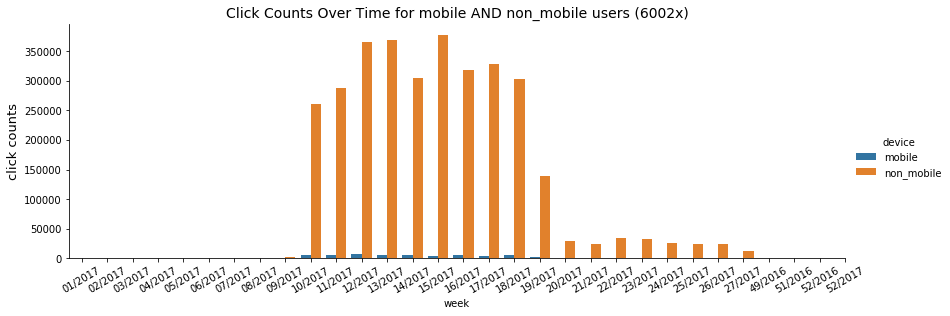

In [23]:
# print("Blue = mobile, Orange = non_mobile")
#plt.title("Counts over time for mobile AND non_mobile users", fontsize = 14)
sns.catplot(x = "week_year", y = "clicks_per_week", hue =  'device', 
            data = all_users_weeks, kind = "bar",
            height = 4, aspect = 3)
plt.title("Click Counts Over Time for mobile AND non_mobile users (6002x)", fontsize = 14)
plt.xlabel('week', fontsize = 10)
plt.ylabel('click counts', fontsize = 13)
plt.xticks(rotation = 30)
#plt.ylim(-.50,7000)
plt.xlim(-.50,30)
plt.show()

2017 ran from 10/2017 to 19/2017
<br>2016 ran from 11/2017 to 18/2019 BUT 2016 HAD A FEW EXTRA UNTESTED WEEKS (TO 13)
<br>Last reliable click in first week of july (two months after course end)

Same graph, but normalize based on TOTALS

In [24]:
# import researchpy as rp

# all_users_to_plot
# #rp.summary_cont(all_users_to_plot['count'].groupby(all_users_to_plot['device']))


In [25]:
MOBILE_SUM = len(mobile_data)
NON_MOBILE_SUM = len(non_mobile_data)

all_users_weeks.loc[all_users_weeks['device'] == 'mobile', 'clicks_per_week'] = all_users_weeks['clicks_per_week'] / MOBILE_SUM 
all_users_weeks.loc[all_users_weeks['device'] == 'non_mobile', 'clicks_per_week'] = all_users_weeks['clicks_per_week'] / NON_MOBILE_SUM 


print(20 / MOBILE_SUM)
all_users_weeks

0.00035686246520590966


,week_year,device,clicks_per_week
0,01/2017,mobile,0.000357
1,01/2017,non_mobile,0.000247
2,02/2017,mobile,0.000517
3,02/2017,non_mobile,0.000210
4,03/2017,mobile,0.000482
...,...,...,...
56,51/2016,non_mobile,0.000089
57,52/2016,mobile,0.000143
58,52/2016,non_mobile,0.000131
59,52/2017,mobile,0.000036


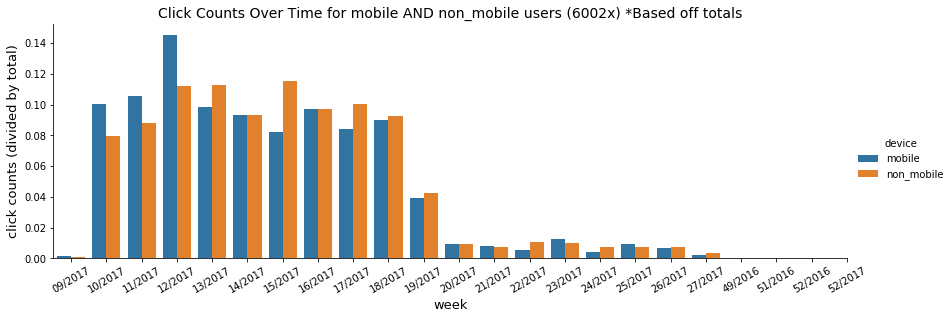

In [26]:
# print("Blue = mobile, Orange = non_mobile")
#plt.title("Counts over time for mobile AND non_mobile users", fontsize = 14)
sns.catplot(x = "week_year", y = "clicks_per_week", hue =  'device', 
            data = all_users_weeks, kind = "bar",
            height = 4, aspect = 3)
plt.title("Click Counts Over Time for mobile AND non_mobile users (6002x) *Based off totals", fontsize = 14)
plt.xlabel('week', fontsize = 13)
plt.ylabel('click counts (divided by total)', fontsize = 13)
plt.xticks(rotation = 30)
#plt.ylim(0,.000005)
#plt.xlim(-.50, 25)
plt.xlim(7.50, 30)
plt.show()

# Observations from plot
<br>-smaller difference i guess than i was expecting
<br>-mobile > mobile at beginning, not true at end (change about halfway thru?)
<br>-some have very little difference, others bigger difference...is there a significant difference? 
<br>-best way to test difference? test against each other or test differences in each group over time?

In [27]:
# all_users_to_plot.loc[all_users_to_plot['device'] == 'mobile', 'count'] = all_users_to_plot['count'] / MOBILE_SUM 
# all_users_to_plot.loc[all_users_to_plot['device'] == 'non_mobile', 'count'] = all_users_to_plot['count'] / NON_MOBILE_SUM 

#all_users_to_plot.groupby(['week_year', 'device'])['count'].describe().head(30)

In [28]:
all_users_weeks
#.groupby(['week_year', 'device'])['clicks_per_week'].describe().head(6)

,week_year,device,clicks_per_week
0,01/2017,mobile,0.000357
1,01/2017,non_mobile,0.000247
2,02/2017,mobile,0.000517
3,02/2017,non_mobile,0.000210
4,03/2017,mobile,0.000482
...,...,...,...
56,51/2016,non_mobile,0.000089
57,52/2016,mobile,0.000143
58,52/2016,non_mobile,0.000131
59,52/2017,mobile,0.000036


***OKAY OKAY OKAY, SO TO DO THE T-TEST:***
<BR>CREATE A DATAFRAME WITH COLUMNS WEEK_YEAR, MOBILE CLICKS_PER_WEEK, NON_MOBILE CLICKS_PER_WEEK


In [29]:
temp_non = all_users_weeks[all_users_weeks['device'].str.contains('non_mobile')]
temp_mob = all_users_weeks[~all_users_weeks['device'].str.contains('non_mobile')]

#delete 49/2017 from non_mobile because very very very small and no coressponding mobile data
temp_non = temp_non.drop(54)

temp_non_list = temp_non.clicks_per_week.tolist()
temp_mob_list = temp_mob.clicks_per_week.tolist()
temp_week_list = temp_mob.week_year.tolist()

print(len(temp_non_list))
print(len(temp_mob_list))
print(len(temp_week_list))
#temp_non
#TODO  AND THEN MAKE BIG DATAFRAME

30
30
30


In [36]:
clean_dataframe = pd.DataFrame()

clean_dataframe['week_year'] = temp_week_list
clean_dataframe['total_mobile_clicks'] = temp_mob_list
clean_dataframe['total_non_mobile_clicks'] = temp_non_list

#remove row if total is under 0.0025
clean_dataframe_1group = clean_dataframe[(clean_dataframe['total_mobile_clicks'] > 0.0025)]
clean_dataframe_1group = clean_dataframe[(clean_dataframe['total_non_mobile_clicks'] > 0.0025)]

clean_dataframe_1group

#this is just to visualize, we will run the tests using the lists to check

,week_year,total_mobile_clicks,total_non_mobile_clicks
9,10/2017,0.100171,0.079490
10,11/2017,0.105667,0.087868
11,12/2017,0.145189,0.111890
12,13/2017,0.098619,0.112723
13,14/2017,0.093034,0.093241
14,15/2017,0.082132,0.115267
15,16/2017,0.097191,0.097117
16,17/2017,0.084166,0.100571
17,18/2017,0.089787,0.092725
18,19/2017,0.039469,0.042526


# Normality Checks

Text(0.5, 1.0, 'Clicks P-P Plot')

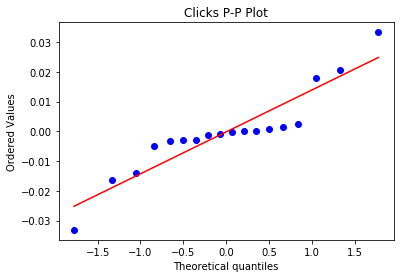

In [37]:
from scipy import stats
import matplotlib.pyplot as plt

diff = clean_dataframe_1group['total_mobile_clicks'] - clean_dataframe_1group['total_non_mobile_clicks']

stats.probplot(diff, plot = plt)
plt.title('Clicks P-P Plot') 


Text(0.5, 0, 'Click Diff')

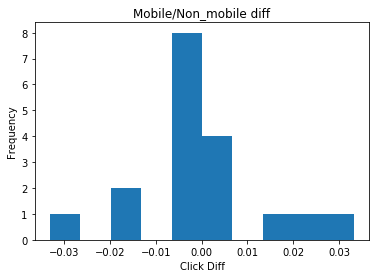

In [38]:
diff.plot(kind= "hist", title= "Mobile/Non_mobile diff")
plt.xlabel("Click Diff")

In [39]:
stats.shapiro(diff)
#p-value is NOT significant, so data is normal enough

(0.8911009430885315, 0.040308065712451935)

In [34]:
stats.ttest_ind(clean_dataframe['total_non_mobile_clicks'], clean_dataframe['total_mobile_clicks'])

Ttest_indResult(statistic=0.00872691033998088, pvalue=0.9930912016538535)

there is NO overall significant difference between mobile and non_mobile clicks per week for 6002x 2017
<br>...look at differences in each week? b/c changes over time? split into two groups, split halfway thru course?

In [41]:
#remove row if total is under 0.0025
clean_dataframe_2groups = clean_dataframe[(clean_dataframe['total_mobile_clicks'] > 0.025)]
clean_dataframe_2groups = clean_dataframe[(clean_dataframe['total_non_mobile_clicks'] > 0.025)]

clean_dataframe_2groups

,week_year,total_mobile_clicks,total_non_mobile_clicks
9,10/2017,0.100171,0.079490
10,11/2017,0.105667,0.087868
11,12/2017,0.145189,0.111890
12,13/2017,0.098619,0.112723
13,14/2017,0.093034,0.093241
14,15/2017,0.082132,0.115267
15,16/2017,0.097191,0.097117
16,17/2017,0.084166,0.100571
17,18/2017,0.089787,0.092725
18,19/2017,0.039469,0.042526


In [46]:
split_first_half = clean_dataframe_2groups.head(5)
split_second_half = clean_dataframe_2groups.tail(len(clean_dataframe_2groups) - 5)

split_first_half

,week_year,total_mobile_clicks,total_non_mobile_clicks
9,10/2017,0.100171,0.079490
10,11/2017,0.105667,0.087868
11,12/2017,0.145189,0.111890
12,13/2017,0.098619,0.112723
13,14/2017,0.093034,0.093241


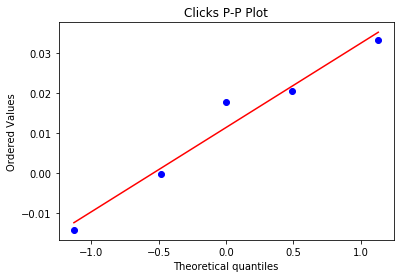

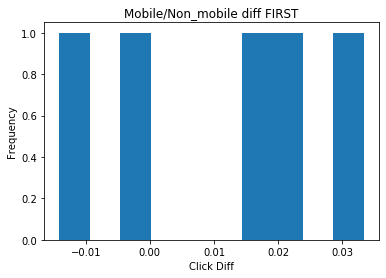

(0.959719181060791, 0.8060266971588135)


Ttest_indResult(statistic=1.001646098280486, pvalue=0.34584479485376435)

In [52]:
diff = split_first_half['total_mobile_clicks'] - split_first_half['total_non_mobile_clicks']

stats.probplot(diff, plot = plt)
plt.title('Clicks P-P Plot') 
plt.show()
diff.plot(kind= "hist", title= "Mobile/Non_mobile diff FIRST")
plt.xlabel("Click Diff")
plt.show()
print(stats.shapiro(diff))
stats.ttest_ind(split_first_half['total_mobile_clicks'], split_first_half['total_non_mobile_clicks'])

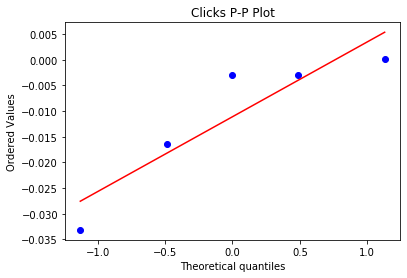

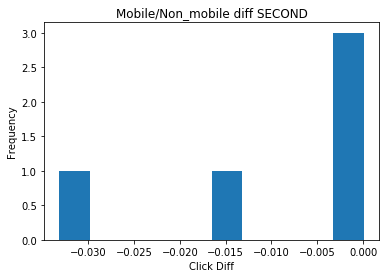

(0.8329143524169922, 0.14626868069171906)


Ttest_indResult(statistic=-0.6941563863126564, pvalue=0.5072371794410286)

In [53]:
diff = split_second_half['total_mobile_clicks'] - split_second_half['total_non_mobile_clicks']

stats.probplot(diff, plot = plt)
plt.title('Clicks P-P Plot') 
plt.show()
diff.plot(kind= "hist", title= "Mobile/Non_mobile diff SECOND")
plt.xlabel("Click Diff")
plt.show()
print(stats.shapiro(diff))
stats.ttest_ind(split_second_half['total_mobile_clicks'], split_second_half['total_non_mobile_clicks'])

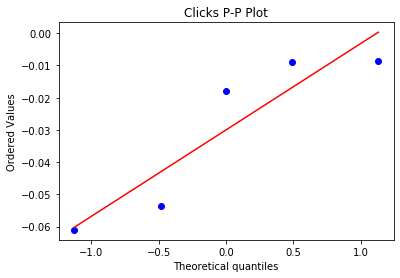

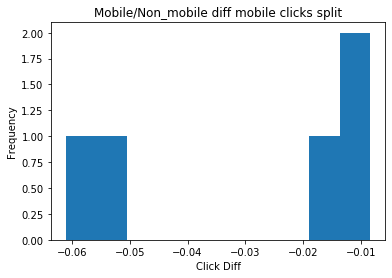

(0.812734842300415, 0.10249289870262146)


Ttest_indResult(statistic=2.173838882769053, pvalue=0.06144976179936499)

In [60]:
split_second_half = split_second_half.reset_index()
split_first_half = split_first_half.reset_index()
diff = split_second_half['total_mobile_clicks'] - split_first_half['total_mobile_clicks'] 

stats.probplot(diff, plot = plt)
plt.title('Clicks P-P Plot') 
plt.show()
diff.plot(kind= "hist", title= "Mobile/Non_mobile diff mobile clicks split")
plt.xlabel("Click Diff")
plt.show()
print(stats.shapiro(diff))
stats.ttest_ind(split_first_half['total_mobile_clicks'], split_second_half['total_mobile_clicks'])

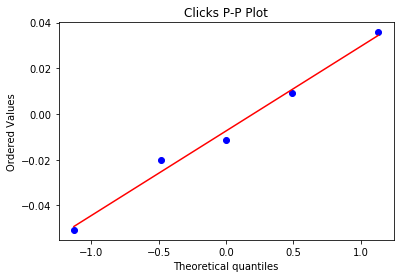

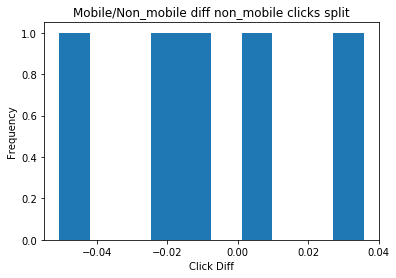

(0.993883490562439, 0.9913718700408936)


Ttest_indResult(statistic=0.5276851518139184, pvalue=0.6120356955847952)

In [62]:
diff = split_second_half['total_non_mobile_clicks'] - split_first_half['total_non_mobile_clicks'] 

stats.probplot(diff, plot = plt)
plt.title('Clicks P-P Plot') 
plt.show()
diff.plot(kind= "hist", title= "Mobile/Non_mobile diff non_mobile clicks split")
plt.xlabel("Click Diff")
plt.show()
print(stats.shapiro(diff))
stats.ttest_ind(split_first_half['total_non_mobile_clicks'], split_second_half['total_non_mobile_clicks'])

NO significant differences between first half and second hald of course (tho so close for mobile...perhaps with more data)
<br>TODO: make the above into a function